<a href="https://colab.research.google.com/github/iauh23/OpenCV-Image-Filter/blob/main/OpenCV_Image_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries:
The following libraries are used:

1. OpenCv
2. Numpy

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow

# Pencil Sketch Effect

File loaded successfully


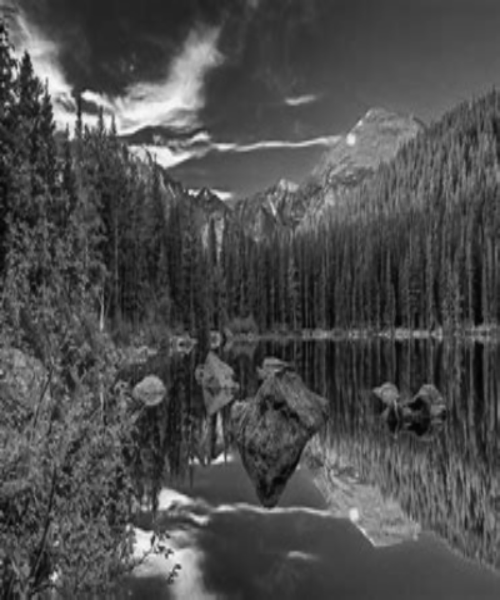

In [38]:
def sketch():
  image = cv.imread("Pic.jpeg")

  if image is None:
   print("Error! Check file again")
  else:
   print("File loaded successfully")


  image = cv.resize(image, (400, 600))

  conversion = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

  inverted_image = cv.bitwise_not(conversion)

  guassian_blurred = cv.GaussianBlur(inverted_image, ksize=(3,3), sigmaX=0)

  inverted_image2= cv.bitwise_not(guassian_blurred)



  blending = cv.addWeighted(conversion, 0.5, inverted_image2, 0.5,0)

  resize = cv.resize(blending, (500, 600))
  cv_imshow(resize)
sketch()


# Cartooning

Image loaded successfully!


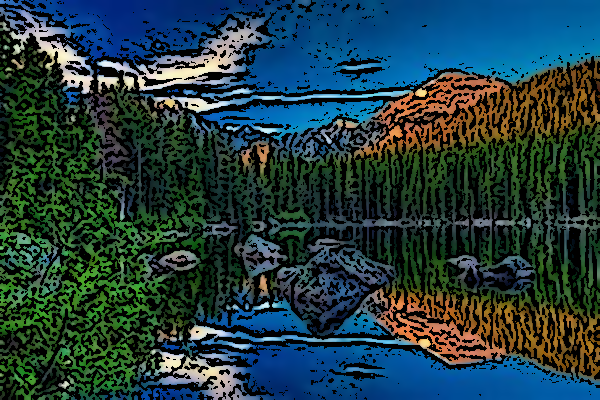

In [34]:
def cartooning():

 image = cv.imread("Pic.jpeg")
 if image is None:
    print("Error: Image not found or failed to load.")
 else:
    print("Image loaded successfully!")


 image = cv.resize(image, (600, 400))

 bilateral_filtered_image = cv.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

 image_conversion = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

 median_blured_image = cv.medianBlur(image_conversion, ksize= 3)

 thresholded_image = cv.adaptiveThreshold(median_blured_image,
                     maxValue=255,
                     adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                     thresholdType=cv.THRESH_BINARY,
                     blockSize=11,C=2)

 edges_colored = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2BGR)

 cartoon = cv.bitwise_and(bilateral_filtered_image, edges_colored)

 cv_imshow(cartoon)

cartooning()

# Water Color Effect

File is loaded successfully


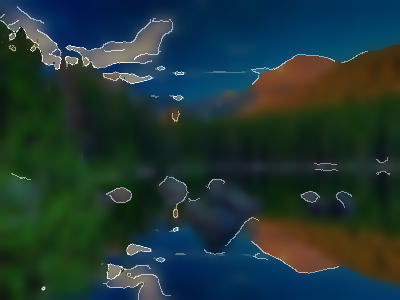

In [15]:
def water_color():
  image = cv.imread("Pic.jpeg")
  if image is None:
    print("File not loaded successfully")
  else:
    print("File is loaded successfully")

  resized_image = cv.resize(image, (400,300))

  bilateral_filter = resized_image
  for i in range(7):
     bilateral_filter = cv.bilateralFilter(bilateral_filter, d=9, sigmaColor=75, sigmaSpace=75)


  conversion = cv.cvtColor(bilateral_filter, cv.COLOR_BGR2GRAY)

  median_blur = cv.medianBlur(conversion, ksize=5)

  edge_detection = cv.Canny(median_blur, threshold1=50, threshold2=100)

  conversion2 =cv.cvtColor(edge_detection, cv.COLOR_GRAY2BGR)

  masking = cv.addWeighted(bilateral_filter, 0.6, conversion2, 0.4,0)

  cv_imshow(masking)

water_color()

# **OPTIONAL**





**Brightness and contrast**

Enter brightness: 1
Enter contrast: 2
Enter Blue value (0-255): 2
Enter Green value (0-255): 3
Enter Red value (0-255): 4


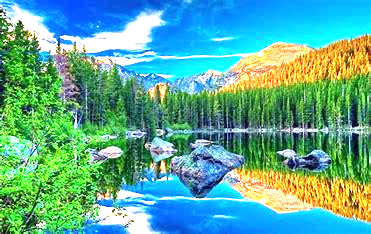

In [16]:
image = cv.imread("Pic.jpeg")
image = image.astype(np.float32)

brightness = float(input("Enter brightness: "))
contrast = float(input("Enter contrast: "))

new_image = image * contrast + brightness

blue = int(input("Enter Blue value (0-255): "))
blue = np.clip(blue, 0, 255)

green = int(input("Enter Green value (0-255): "))
green = np.clip(green, 0, 255)

red = int(input("Enter Red value (0-255): "))
red = np.clip(red, 0, 255)


tint = np.array([blue, green, red])

new_image = new_image + tint
cv_imshow(new_image)